In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report


In [73]:
df=pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df.drop('customerID',axis=1,inplace=True)

In [75]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [76]:
df1= df[df.TotalCharges!=' '].copy()
df1.TotalCharges.values
df1['TotalCharges']= pd.to_numeric(df1.TotalCharges)

In [77]:
df1.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ],
      shape=(6530,))

In [78]:
tenure_No= df1[df1.Churn=='No'].tenure
tenure_Yes= df1[df1.Churn=='Yes'].tenure

Text(0.5, 1.0, 'Tenure vs employees')

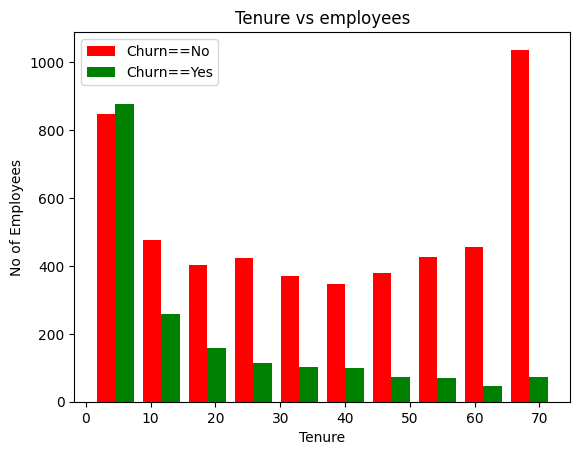

In [79]:
plt.hist([tenure_No,tenure_Yes],color=['red','green'],label=['Churn==No','Churn==Yes'])
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("No of Employees")
plt.title("Tenure vs employees")

Text(0.5, 1.0, 'MonthlyCharges vs employees')

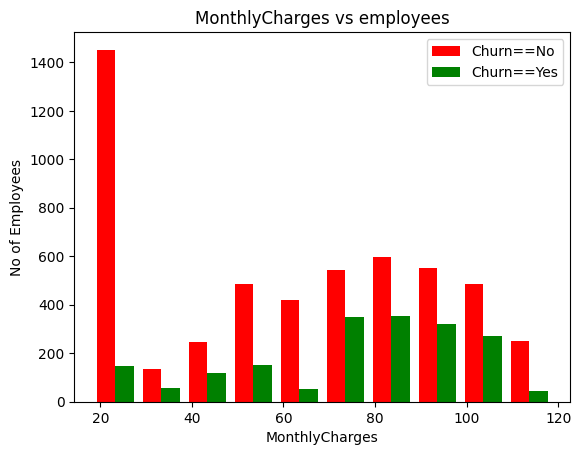

In [80]:
MonthlyCharges_No= df1[df1.Churn=='No'].MonthlyCharges      
MonthlyCharges_Yes= df1[df1.Churn=='Yes'].MonthlyCharges 
plt.hist([MonthlyCharges_No,MonthlyCharges_Yes],color=['red','green'],label=['Churn==No','Churn==Yes'])
plt.legend()
plt.xlabel("MonthlyCharges")
plt.ylabel("No of Employees")
plt.title("MonthlyCharges vs employees")
     

In [81]:
def print_diff_values(df1):
    for column in df1:
        if df1[column].dtype=='object':
            print(column,df1[column].unique())


print_diff_values(df1)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [82]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\mayan\AppData\Local\Temp\ipykernel_17328\3332327719.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\mayan\AppData\Local\Temp\ipykernel_17328\3332327719.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [83]:
print_diff_values(df1)

Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [84]:
categorial_columns= ['InternetService','Contract','PaymentMethod' ]
df1= pd.get_dummies(df1,columns=categorial_columns,drop_first=True)

In [85]:
yes_no_colums= ['Partner','Dependents','PhoneService',
                'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection'
                ,'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_colums:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\mayan\AppData\Local\Temp\ipykernel_17328\1113459866.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\mayan\AppData\Local\Temp\ipykernel_17328\1113459866.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1,

In [86]:
scaler= MinMaxScaler()
X=df1.drop(['Churn'],axis=1)
y=df1['Churn']
colums_to_scaled=['tenure','SeniorCitizen','TotalCharges','MonthlyCharges']
X[colums_to_scaled] = scaler.fit_transform(X[colums_to_scaled])

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [87]:
# def ANN(X_train, y_train, X_test, y_test, loss, weights):
#     X_train = np.asarray(X_train).astype(np.float32)
#     y_train = np.asarray(y_train).astype(np.float32)
#     X_test = np.asarray(X_test).astype(np.float32)
#     y_test = np.asarray(y_test).astype(np.float32)

#     model = keras.Sequential([
#         keras.layers.Dense(23, input_dim=23, activation='relu'),
#         keras.layers.Dense(15, activation='relu'),
#         keras.layers.Dense(1, activation='sigmoid')
#     ])

#     model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
#     if weights == -1:
#         model.fit(np.asarray(X_train).astype(np.float32), np.asarray(y_train).astype(np.float32), epochs=5000)

#     else:
#         model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
#     print(model.evaluate(X_test, y_test))
    
    
#     y_preds = model.predict(X_test)
#     y_preds = np.round(y_preds)
    
#     print("Classification Report: \n", classification_report(y_test, y_preds))
#     return y_preds

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

def ANN(X_train, y_train, X_test, y_test, loss, weights, batch_size=100):
    # Convert inputs
    X_train = np.asarray(X_train).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.float32)

    input_shape = (X_train.shape[1],)

    # Define model
    model = keras.Sequential([
        keras.layers.Dense(23, input_shape=input_shape, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

    # Create datasets with adjustable batch size
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

    if weights == -1:
        model.fit(train_dataset, epochs=2000, callbacks=[early_stop])
    else:
        # Note: class_weight is not supported with tf.data.Dataset input
        model.fit(train_dataset, epochs=100, callbacks=[early_stop])

    print(model.evaluate(test_dataset))

    y_preds = model.predict(test_dataset)
    y_preds = np.round(y_preds)

    print("Classification Report:\n", classification_report(y_test, y_preds))
    return y_preds


In [89]:
y_preds = ANN(X_train, y_train, X_test, y_test, loss='binary_crossentropy', weights=-1, batch_size=1500)


Epoch 1/2000


c:\Users\mayan\.conda\envs\tf2_19\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7139 - loss: 0.6173  
Epoch 2/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7284 - loss: 0.6009 
Epoch 3/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - loss: 0.5867 
Epoch 4/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7343 - loss: 0.5745 
Epoch 5/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7343 - loss: 0.5639 
Epoch 6/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7343 - loss: 0.5543 
Epoch 7/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7343 - loss: 0.5454 
Epoch 8/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7343 - loss: 0.5371 
Epoch 9/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7343 - loss: 0.5289 
Epoch 10/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7343 - loss: 0.5210 
Epoch 11/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7343 - loss: 0.5132
Epoch 12/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7343 - loss

You Could see thatthe overall accuracy is 76% but the data is imbalanced that for 1th class accuracy is 83% but the 0th class is 55%.

For this imbalance issue we have some option to do called sampling

1. UnderSampling

In [90]:
count_class_0, count_class_1 = df1.Churn.value_counts()
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [91]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [92]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [93]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/2000


c:\Users\mayan\.conda\envs\tf2_19\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6117 - loss: 0.9093   
Epoch 2/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7067 - loss: 0.5856
Epoch 3/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7110 - loss: 0.6081 
Epoch 4/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7087 - loss: 0.6086 
Epoch 5/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7304 - loss: 0.5283 
Epoch 6/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 0.5382 
Epoch 7/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7237 - loss: 0.6208
Epoch 8/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7258 - loss: 0.6100
Epoch 9/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7371 - loss: 0.5559
Epoch 10/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.5810
Epoch 11/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7398 - loss: 0.5384
Epoch 12/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

This is the classification for undersampling and it can be noticed that we got equal samples for both 0th and 1th and for the 1th it increased from 53 to 67%.

2. Oversampling

In [94]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [95]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [96]:
y_train.value_counts()


Churn
1    4130
0    4130
Name: count, dtype: int64

In [ ]:
from tabnanny import verbose


y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/2000


c:\Users\mayan\.conda\envs\tf2_19\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5812 - loss: 64.2355 
Epoch 2/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - loss: 1.0548
Epoch 3/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.6093
Epoch 4/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7154 - loss: 0.6303
Epoch 5/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7110 - loss: 0.6649
Epoch 6/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.9189
Epoch 7/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7091 - loss: 0.7780
Epoch 8/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7192 - loss: 0.6766
Epoch 9/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7266 - loss: 0.6450
Epoch 10/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7349 - loss: 0.5788
Epoch 11/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7038 - loss: 0.9399
Epoch 12/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

Here we can observe that after oversampling we got around 4100 for both 0th and 1th class and the precision of 1th i 72% and 0th is 80% with overall accuracy of 75%


3. SMOTE Sampling

In [98]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()


Churn
0    5163
1    5163
Name: count, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [100]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/2000


c:\Users\mayan\.conda\envs\tf2_19\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5199 - loss: 10.2884  
Epoch 2/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7308 - loss: 0.5886
Epoch 3/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.5714
Epoch 4/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7369 - loss: 0.6070
Epoch 5/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7628 - loss: 0.5120
Epoch 6/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7515 - loss: 0.5826
Epoch 7/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.5610
Epoch 8/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7665 - loss: 0.5640
Epoch 9/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7826 - loss: 0.4952
Epoch 10/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.5028
Epoch 11/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.4714
Epoch 12/2000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

Here we dont get much difference in precision but sightly higher for 0th class an and overall accuracy of 81%